In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from math import log10, sqrt
import numpy as np

def PSNR(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

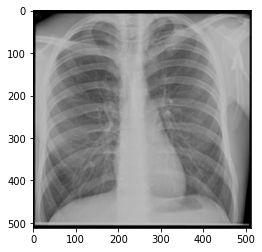

In [4]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Tuberculosis-103.png')
plt.imshow(img)

14.067202495053273


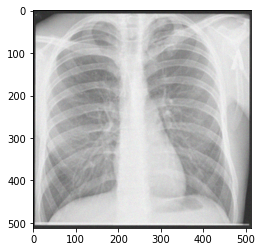

In [ ]:
##def add_poisson_noise(imgg, lam):
   ## poisson = np.random.poisson(lam, np.shape(img))
  ##  noisy_img = img + poisson
    ##noisy_img[noisy_img < 0] = 0
   ## noisy_img[noisy_img > 255] = 255
   ## return noisy_img

##noiseimg = add_poisson_noise(imgg,50)
##plt.imshow(noiseimg)
##print(PSNR(img,noiseimg))

**MEDIAN FILTER**

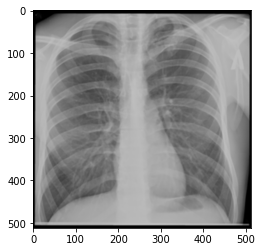

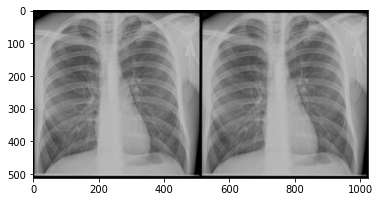

In [5]:
medianimg = cv2.medianBlur(img, 3) #input image, kernel
compare = np.concatenate((img, medianimg), axis=1) #side by side comparison
plt.imshow(medianimg)
plt.show()
plt.imshow(compare)



**TOPHAT BOTHAT Transform**

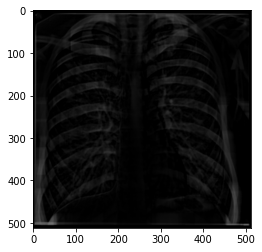

In [6]:
filterSize =(30, 30)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, 
                                   filterSize)
#imgg = cv2.cvtColor(medianimg, cv2.COLOR_BGR2GRAY)
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(medianimg, 
                              cv2.MORPH_TOPHAT,
                              kernel)
plt.imshow(tophat_img)

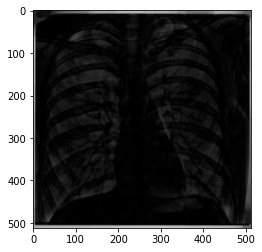

In [7]:
# Applying the Black-Hat operation
tophat_img1 = cv2.morphologyEx(medianimg, 
                              cv2.MORPH_BLACKHAT,
                              kernel)
plt.imshow(tophat_img1)
  

14.064323306170735


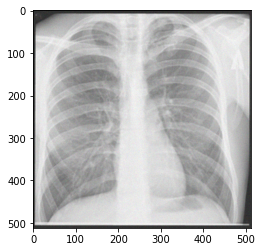

In [8]:
########### Adding Noise ###############
def add_poisson_noise(img, lam):
    poisson = np.random.poisson(lam, np.shape(img))
    noisy_img = img + poisson
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

noise_img = add_poisson_noise(img,50)

plt.imshow(noise_img)
print(PSNR(img,noise_img))

In [14]:
# Median Spatial Domain Filtering

# Obtain the number of rows and columns
# of the image
m, n ,channels= noise_img.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the ceter pixel by the median
img_new1 = np.zeros([m, n])


for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [noise_img[i-1, j-1],
			noise_img[i-1, j],
			noise_img[i-1, j + 1],
			noise_img[i, j-1],
			noise_img[i, j],
			noise_img[i, j + 1],
			noise_img[i + 1, j-1],
			noise_img[i + 1, j],
			noise_img[i + 1, j + 1]]
		
		temp.sorted()
		img_new1[i, j]= temp[3]

img_new1 = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)


AttributeError: ignored

31.22582719291379


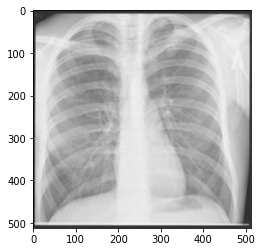

In [18]:
from scipy import ndimage
im_med = ndimage.median_filter(noise_img, 3)
plt.imshow(im_med)
print(PSNR(noise_img,im_med))

for Top and Bot Hat filtering PSNR:  39.388004378802236


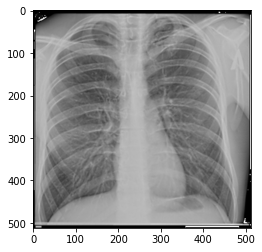

In [24]:
def top_bot_hat_filter(img,kernel_size = 5):
  kernel = np.ones((kernel_size,kernel_size),np.uint8)
  fo = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  fc = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

  T_hat = img - fo
  B_hat = fc - img

  filt_img = img + T_hat - B_hat
  return filt_img

filtered_img = top_bot_hat_filter(medianimg,5)
plt.imshow(filtered_img)
print("for Top and Bot Hat filtering PSNR: ",PSNR(img,filtered_img))

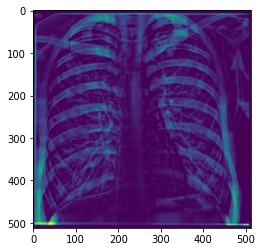

In [27]:
filterSize =(30, 30)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, 
                                   filterSize)
imgg = cv2.cvtColor(medianimg, cv2.COLOR_RGB2GRAY)
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(imgg, 
                              cv2.MORPH_TOPHAT,
                              kernel)
plt.imshow(tophat_img)

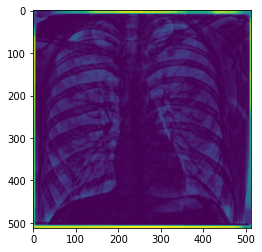

In [28]:
# Applying the Black-Hat operation
tophat_img1 = cv2.morphologyEx(imgg, 
                              cv2.MORPH_BLACKHAT,
                              kernel)
plt.imshow(tophat_img1)
  

for Top and Bot Hat filtering PSNR:  39.388004378802236


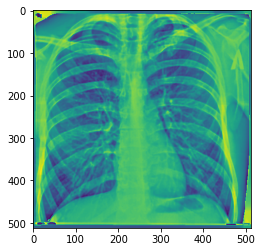

In [29]:
filt_imgg = imgg + tophat_img - tophat_img1
plt.imshow(filt_imgg)
print("for Top and Bot Hat filtering PSNR: ",PSNR(img,filtered_img))